# Ellitpic Integrals and Functions
### AUTHOR: Robert Poenaru
#### email: <robert.poenaru@drd.unibuc.ro>
#### March 1st, 2020

Study of the Jacobi elliptic integrals:
 * The Jacobi integral of first kind (complete) $F(k)$
 * The incomplete Jacobi elliptic integral of first kind $F(\phi,k)$

## 1. Import scipy module

In [53]:
import scipy.special as sp

## 2. Import numpy module

In [54]:
import numpy as np

## 3. Import matplotlib module

In [55]:
import matplotlib.pyplot as plt
from matplotlib import rc

In [56]:
umax=7
umin=0
ustep=0.1
uValues=[]
sVar=[]
cVar=[]
dVar=[]
fiVar=[]
for u in np.arange(umin,umax,0.1):
    jac=sp.ellipj(u, 0.5) 
    sVar.append(jac[0])
    cVar.append(jac[1])
    dVar.append(jac[2])
    fiVar.append(jac[3])
    uValues.append(jac)

In [57]:
# period K
period=[]
for i in range(1,5):
    currentvalue=np.pi/2.0*sp.hyp2f1(0.5,0.5,1,0.5)*i
    period.append(currentvalue)

In [58]:
period

[1.8540746773013705, 3.708149354602741, 5.562224031904112, 7.416298709205482]

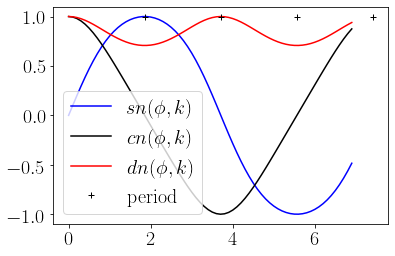

In [59]:
plt.plot(np.arange(0,umax,0.1),sVar,'b-',label='$sn(\phi,k)$')
plt.plot(np.arange(0,umax,0.1),cVar,'k-',label='$cn(\phi,k)$')
plt.plot(np.arange(0,umax,0.1),dVar,'r-',label='$dn(\phi,k)$')
plt.plot(period,np.zeros(4)+1,'k+',label='period')
plt.legend(loc='best')

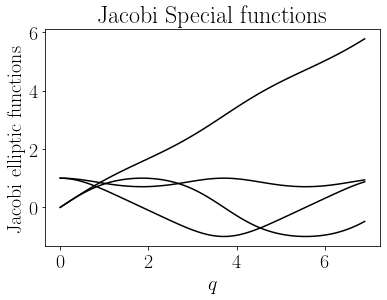

In [60]:
qValues = np.arange(umin, umax, ustep)
id=0
for i in qValues:
    id+=1
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.plot(qValues, uValues, 'k-')

plt.xlabel('$q$')
plt.ylabel('Jacobi elliptic functions')
plt.title('Jacobi Special functions')
plt.show()

# Declare the elliptic routines:

The inertia functions

In [61]:
def fiFct(q,k):
    ksquared=np.power(k,2)
    retval=sp.ellipj(q,ksquared)
    return retval
def aFfct(spin,a1,a2,theta,j):
    j2=j*np.sin(theta*np.pi/180.0)
    retval=a2*(1-j2/spin)-a1;
    return retval
def uFct(spin,a1,a2,a3,theta,j):
    # j1=j*np.cos(theta*np.pi/180.0)
    # j2=j*np.sin(theta*np.pi/180.0)
    retval=(a3-a1)/aFfct(spin,a1,a2,theta,j)
    return retval
def kFct(spin,a1,a2,a3,theta,j):
    retval=np.sqrt(uFct(spin,a1,a2,a3,theta,j))
    return retval
def v0Fct(spin,a1,a2,theta,j):
    j1=j*np.cos(theta*np.pi/180.0)
    # j2=j*np.sin(theta*np.pi/180.0)
    retval=-(a1*j*np.cos(theta*np.pi/180.0))/aFfct(spin,a1,a2,theta,j)
    return retval

The elliptic routines:

In [62]:
def snFct(q,k):
    return np.sin(fiFct(q,k))
def cnFct(q,k):
    return np.cos(fiFct(q,k))
def dnFct(q,k):
    return np.sqrt(1.0-k*k*snFct(q,k)*snFct(q,k))
def inertiaFactor(moi):
    return 1.0/(2.0*moi)

In [63]:
#define the constants
spinValue=45.0/2.0
j=6.5
THETA=210
I1=20
I2=100
I3=40
A1=inertiaFactor(I1)
A2=inertiaFactor(I2)
A3=inertiaFactor(I3)
#__________________________

#define the componets of single particle angular momentum j
def angularComponent(j,theta,k):
    retval=0
    thetadeg=theta*np.pi/180.0
    if(k==1):
        retval=j*np.cos(thetadeg)
    else:
        retval=j*np.sin(thetadeg)
    return retval

# Potential 

In [64]:
def rotorPotential(spin,theta,q,k,v0,s,c,d):
    t1=spin*(spin+1.0)*np.power(k,2)+np.power(v0,2)
    t2=t1*np.power(s,2)
    t3=(2.0*spin+1)*v0*c*d
    return t2+t3

## Triaxial potential - tables with values

In [65]:
def kRaduta(spin,theta):
    return kFct(spin,A1,A2,A3,theta,j)
def v0Raduta(spin,theta):
    return v0Fct(spin,A1,A2,theta,j)

In [66]:
#generate the elliptic functions which eneter the potential V(q) 
def populateEllipticFunctions(spin,theta):
    kvalue=kRaduta(spin,theta)
    for i in qTable:
        snValues.append(snFct(i,kvalue)[3])
        cnValues.append(cnFct(i,kvalue)[3])
        dnValues.append(dnFct(i,kvalue)[3])

def populatePotential(qs,array,spin,theta):
    for i in qs:
        currentvalue=rotorPotential(spin,theta,i,kRaduta(spin,theta),v0Raduta(spin,theta),snFct(i,kRaduta(spin,theta))[3],cnFct(i,kRaduta(spin,theta))[3],dnFct(i,kRaduta(spin,theta))[3])
        array.append(currentvalue)

In [67]:
fiTable=[]
qTable=[]
snValues=[]
cnValues=[]
dnValues=[]
#define the k variable which enters the potential
kValues=[]

# generate the q's and the fi's
for i in np.arange(0.,8.1,0.1):
    fiTable.append(fiFct(i,kRaduta(spinValue,THETA))[3])
    qTable.append(i)

In [68]:
#triaxial potential for different spins
#potential with spinvalue 13/2
potential1=[]
spin1=13/2
theta1=30
# populateEllipticFunctions(spin1,theta1)
populatePotential(qTable,potential1,spin1,theta1)
#potential with spinvalue 21/2
potential2=[]
spin2=21/2
theta2=30
# populateEllipticFunctions(spin2,theta2)
populatePotential(qTable,potential2,spin2,theta2)
#potential with spinvalue 29/2
potential3=[]
spin3=29/2
theta3=30
# populateEllipticFunctions(spin3,theta3)
populatePotential(qTable,potential3,spin3,theta3)
#potential with spinvalue 37/2
potential4=[]
spin4=37/2
theta4=30
# populateEllipticFunctions(spin4,theta4)
populatePotential(qTable,potential4,spin4,theta4)
#potential with spinvalue 45/2
potential5=[]
spin5=45/2
theta5=30
# populateEllipticFunctions(spin5,theta5)
populatePotential(qTable,potential5,spin5,theta5)

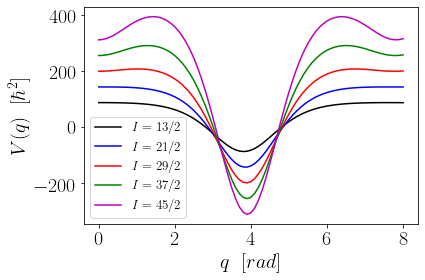

In [69]:
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 20})
## for Palatino and other serif fonts use:
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

plt.plot(qTable,potential1,'k-',label='$I=13/2$')
plt.plot(qTable,potential2,'b-',label='$I=21/2$')
plt.plot(qTable,potential3,'r-',label='$I=29/2$')
plt.plot(qTable,potential4,'g-',label='$I=37/2$')
plt.plot(qTable,potential5,'m-',label='$I=45/2$')
plt.legend(loc='best',prop={'size': 13})

plt.xlabel('$q\ \  [rad]$')
plt.ylabel('$V(q)\ \  [\hbar^2]$')
plt.savefig('draftFig3.pdf',bbox_inches='tight')
plt.show()

In [70]:
potential5

[312.39602702197374,
 313.53583739300984,
 316.87605121496244,
 322.18873329517623,
 329.12426562848447,
 337.2500328010886,
 346.09326964814784,
 355.1808304542533,
 364.070528212198,
 372.3713505368273,
 379.7523971853001,
 385.9422145337935,
 390.721132710611,
 393.90936075325664,
 395.3532363862075,
 394.9114446785119,
 392.44243127020303,
 387.79376867865795,
 380.79393979654606,
 371.24688232128557,
 358.92966644251516,
 343.5938194400593,
 324.9710232567798,
 302.78414548991225,
 276.7647567050143,
 246.6783491771189,
 212.3582831907766,
 173.74889304440418,
 130.95701588766764,
 84.30932202919377,
 34.410199624109424,
 -17.808207812003587,
 -71.05531064283932,
 -123.68423705053074,
 -173.73989221171712,
 -219.06164958254004,
 -257.44061795756943,
 -286.8189921287551,
 -305.50572294038307,
 -312.37299149724697,
 -306.99614287576287,
 -289.7081331930257,
 -261.55675965105075,
 -224.17390931005446,
 -179.5840677432155,
 -129.98896424413175,
 -77.5645927278405,
 -24.297850769146862

# Declaring the chiral potential

The chiral potential is calculated in terms of two spearate potentials:
1. A symmetric potential $V_s$
2. An antisymmetric potential $V_a$

Given a triaxial potential $V_\theta$, which is calculated as a function of elliptic variables, for a fixed value of the total spin $I$, then the **chiral potentials** $\{V_a,V_s\}$ are defined as:
$$V_s=\frac{V_{\theta_1}+V_{\theta_2}}{2}$$
$$V_a=\frac{V_{\theta_1}-V_{\theta_2}}{2}$$

> in our case:
$\theta_1=30^o$ and $\theta_2=150^o$

# Method for computing the chiral potential
For any parameters $(\theta_!,\theta_2,I,q)$
> returns a tuple of the form $(V_s,V_a)$

In [71]:
def chiralPotential(q,spin,theta1,theta2):
    A1=inertiaFactor(20)
    A2=inertiaFactor(100)
    A3=inertiaFactor(40)
    j=6.5
    t1=A3-A1
    #for theta1
    t2_theta1=A2*(1-j*np.sin(theta1*np.pi/180.0)/spin)-A1
    uValue_theta1=t1/t2_theta1
    kValue_theta1=np.sqrt(uValue_theta1)
    #for theta2
    t2_theta2=A2*(1-j*np.sin(theta2*np.pi/180.0)/spin)-A1
    uValue_theta2=t1/t2_theta2
    kValue_theta2=np.sqrt(uValue_theta2)
    kSquared_theta1=np.power(kValue_theta1,2)
    kSquared_theta2=np.power(kValue_theta2,2)
    fiVar_theta1=sp.ellipj(q,kSquared_theta1)[3]
    fiVar_theta2=sp.ellipj(q,kSquared_theta2)[3]
    v0_theta1=-(A1*j*np.cos(theta1*np.pi/180.0))/t2_theta1
    v0_theta2=-(A1*j*np.cos(theta2*np.pi/180.0))/t2_theta2
    sn1=np.sin(fiVar_theta1)
    sn2=np.sin(fiVar_theta2)
    cn1=np.cos(fiVar_theta1)
    cn2=np.cos(fiVar_theta2)
    dn1=np.sqrt(1-np.power(kValue_theta1,2)*np.power(sn1,2))
    dn2=np.sqrt(1-np.power(kValue_theta2,2)*np.power(sn2,2))
    vTheta1=(spin*(spin+1)*np.power(kValue_theta1,2)+np.power(v0_theta1,2))*np.power(sn1,2)+(2*spin+1)*v0_theta1*cn1*dn1
    vTheta2=(spin*(spin+1)*np.power(kValue_theta2,2)+np.power(v0_theta2,2))*np.power(sn2,2)+(2*spin+1)*v0_theta2*cn2*dn2
    vSymmetric=0.5*(vTheta1+vTheta2)
    vAsymmetric=0.5*(vTheta1-vTheta2)
    retval=(vSymmetric,vAsymmetric)
    return retval

In [72]:
#declare the variable q
qTable=np.arange(-8,8.1,0.1)

In [73]:
vsTable=[]
vaTable=[]
chiralTable=[]
for i in qTable:
    spinValue=45/2
    theta1=30
    theta2=210
    vaTable.append(chiralPotential(i,spinValue,theta1,theta2)[1])
    vsTable.append(chiralPotential(i,spinValue,theta1,theta2)[0])
    chiralTable.append(chiralPotential(i,spinValue,theta1,theta2))
    

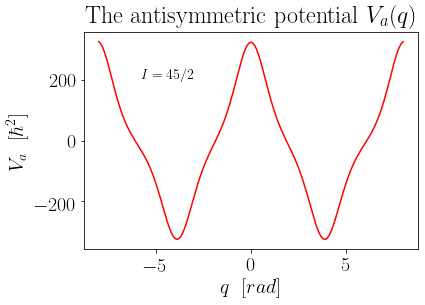

In [74]:
fig, ax=plt.subplots()
ax.plot(qTable,vaTable,'r-')
plt.title('The antisymmetric potential $V_a(q)$')
plt.xlabel('$q\ \  [rad]$')
plt.ylabel('$V_a\ \  [\hbar^2]$')
plt.savefig('antiSymmetricPotential.pdf',bbox_inches='tight')

ax.text(0.25, 0.8, '$I=45/2$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=14)
plt.show()

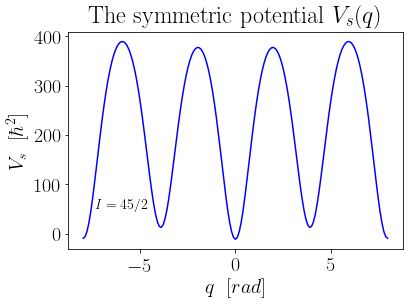

In [75]:
fig, ax=plt.subplots()
ax.plot(qTable,vsTable,'b-')
plt.title('The symmetric potential $V_s(q)$')
plt.xlabel('$q\ \  [rad]$')
plt.ylabel('$V_s\ \  [\hbar^2]$')
plt.savefig('symetricPotential.pdf',bbox_inches='tight')

ax.text(0.16, 0.2, '$I=45/2$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=14)
plt.show()

In [76]:
for i in range(len(vaTable)):
    print(qTable[i],vaTable[i])

-8.0 325.90915822520583
-7.9 319.53121030536033
-7.800000000000001 307.88868351251074
-7.700000000000001 291.7050938071476
-7.600000000000001 271.9221542560234
-7.500000000000002 249.58886903322826
-7.400000000000002 225.75260837171209
-7.3000000000000025 201.3692489550669
-7.200000000000003 177.24205393998565
-7.100000000000003 153.99111693481547
-7.0000000000000036 132.04918599007016
-6.900000000000004 111.67648890330881
-6.800000000000004 92.98658830681757
-6.700000000000005 75.97644434340258
-6.600000000000005 60.555791641047136
-6.500000000000005 46.57291287806882
-6.400000000000006 33.83550769223385
-6.300000000000006 22.126481673782507
-6.200000000000006 11.215153373211052
-6.100000000000007 0.8647086234864219
-6.000000000000007 -9.163157443958028
-5.9000000000000075 -19.105478278842412
-5.800000000000008 -29.196256708060787
-5.700000000000008 -39.66489108092253
-5.6000000000000085 -50.734012130315904
-5.500000000000009 -62.615980357965384
-5.400000000000009 -75.50731364536566
-

In [77]:
for i in range(len(vsTable)):
    print(qTable[i],vsTable[i])

-8.0 -9.553568250046766
-7.9 -6.256048367409335
-7.800000000000001 4.52450637189267
-7.700000000000001 22.124546514651854
-7.600000000000001 45.50403910374493
-7.500000000000002 73.36940596130864
-7.400000000000002 104.31126947049914
-7.3000000000000025 136.93392303610455
-7.200000000000003 169.95928534851876
-7.100000000000003 202.29643146698027
-7.0000000000000036 233.07583647825726
-6.900000000000004 261.6533495038908
-6.800000000000004 287.5919840288726
-6.700000000000005 310.63018420466074
-6.600000000000005 330.6441216628382
-6.500000000000005 347.6096732653382
-6.400000000000006 361.5677131991481
-6.300000000000006 372.5946338527703
-6.200000000000006 380.77875789904294
-6.100000000000007 386.2025251080384
-6.000000000000007 388.92995388534723
-5.9000000000000075 388.99878502741797
-5.800000000000008 386.4168150702018
-5.700000000000008 381.162138384256
-5.6000000000000085 373.1872780525481
-5.500000000000009 362.42744308629415
-5.400000000000009 348.8133512878054
-5.30000000000